# Data exploration and preparation for Machine Learning

## Hands on case study
Explore NYC Trips dataset to
- get knowledge of relationships between variables
  - create better features
- remove outliers
  - get a robuster model

using
  - python in jupyter
  - pandas, matplotlib and seaborn modules

### Useful shortcuts in Jupyter
  - run current cell 
    - `shift + Enter`
  - go into cell to modify 
    - `Enter` (the frame around cell becomes **green**)
  - deselect cell
    - `Esc` (the frame around cell becomes **blue**)
  - new cell **above** current cell 
    - `Esc` to deselect followed by `A`
  - new cell **below** current cell
    - `Esc` to deselect followed by `B`

## Introduce dataset - New York City Taxi Trip Duration
- challenge on kaggle
- goal to predict the `trip_duration` based on few features:
  - `vendor_id` (provider of the trip, such as Uber, Lyft, etc.)
  - `pickup_datetime`
  - `passenger_count`
  - `pickup_longitude`
  - `pickup_latitude`
  - `dropoff_longitude`
  - `dropoff_latitude`

## Let's get started
### Downloading the dataset
- create an account at https://www.kaggle.com/
- go to https://www.kaggle.com/hobilek/nyc-trips-amld and fork it
- you can also just download the dataset and work locally on your jupyter

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns

In [2]:
# increase the font size of the plots
FONT_SIZE = 14
mpl.rcParams['xtick.labelsize'] = FONT_SIZE 
mpl.rcParams['ytick.labelsize'] = FONT_SIZE
mpl.rcParams['legend.fontsize'] = FONT_SIZE
mpl.rcParams['axes.labelsize'] = FONT_SIZE
mpl.rcParams['figure.figsize'] = (10, 10)

In [3]:
def precision(x, precision):
    """Round a number or array to a given precision
    :Example:

    precision(np.array([3.71, 4.59]), 0.02)
    >> array([3.72, 4.6 ])
    
    precision(np.array([154, 396]), 10)
    >> array([150, 400 ])
    """
    return (np.round(x / precision) * precision).astype(type(precision))

def load_dataset(file_path):
    df = pd.read_csv(file_path, index_col='id', parse_dates=['pickup_datetime'])
    df = df.head(100000)
    # convert the `trip_duration` from seconds to minutes for convenience
    df['trip_duration_minutes'] = df['trip_duration'] / 60.0
    df.drop(['dropoff_datetime', 'store_and_fwd_flag', 'trip_duration'], axis=1, inplace=True)
    return df

def plot_boxplot(df, n_rows, n_cols, figsize=(18, 24)):
    numeric_columns = df.select_dtypes(include=np.number).columns
    fig, axn = plt.subplots(n_rows, n_cols, figsize=figsize)
    for col, ax in zip(numeric_columns, axn.flatten()):
        sns.boxplot(df[col], orient='v', ax=ax)

In [4]:
file_path = '../input/train.csv'

df = load_dataset(file_path)

df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration_minutes
id,,,,,,,,
id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,7.583333
id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,11.050000
id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,35.400000
id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,7.150000
id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,7.250000


## TASK 1 - Exploring column values
How are the values in each column distributed?
- Which columns include missing values?
- Which columns include only few different values?
- Did you find any outliers? Filter them out.
- *(optional)* Based on your information, try to sketch the distribution.

The function `describe` shows minimum and maximum of each column, as well as mean, quantiles and other statistics.

It is similar to R's `summary` function.

In [5]:
df.describe(percentiles=[0.1, 0.25, 0.75, 0.9])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration_minutes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.53349,1.667810,-73.973464,40.751059,-73.973455,40.751947,15.664404
std,0.49888,1.317603,0.038294,0.028152,0.036625,0.032452,50.075687
min,1.00000,0.000000,-74.533875,40.433842,-74.562355,40.441662,0.016667
10%,1.00000,1.000000,-74.002587,40.720359,-74.002923,40.715488,4.066667
25%,1.00000,1.000000,-73.991852,40.737370,-73.991394,40.735844,6.600000
50%,2.00000,1.000000,-73.981712,40.754269,-73.979782,40.754478,11.033333
75%,2.00000,2.000000,-73.967209,40.768426,-73.962919,40.769928,17.933333
90%,2.00000,4.000000,-73.951881,40.780434,-73.947083,40.785030,27.216667
max,2.00000,6.000000,-73.334023,41.319164,-72.711395,41.311520,1439.833333


We could also visualize the previous summary using boxplots.

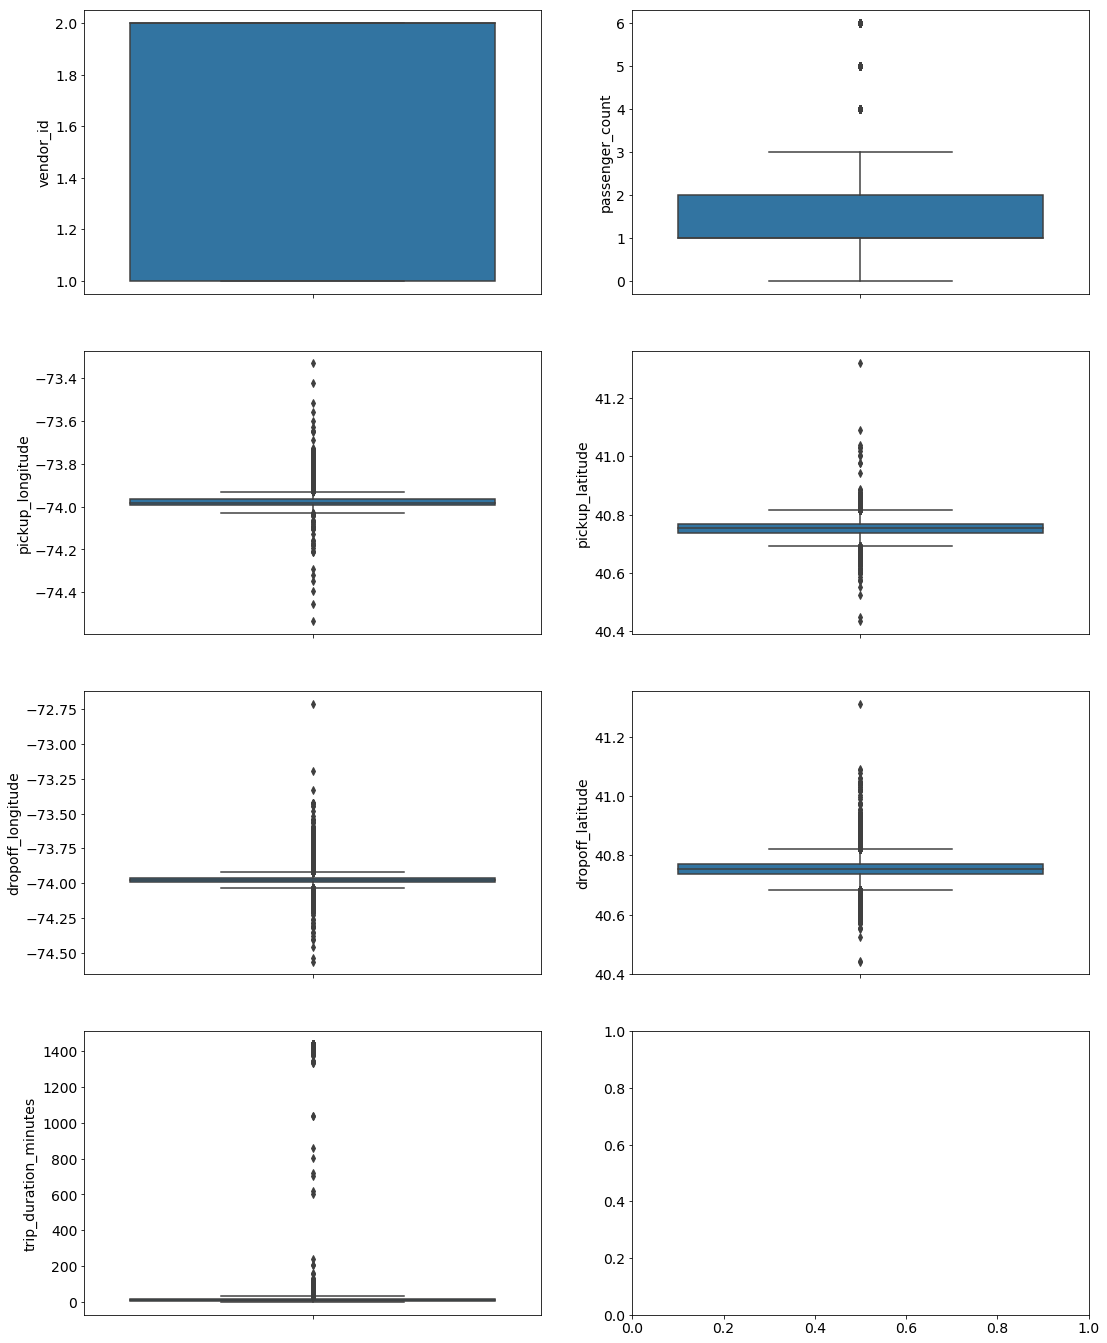

In [6]:
plot_boxplot(df, n_rows=4, n_cols=2)

## TASK 2 - Outliers (part 1)
- Eliminate outliers from the column `trip_duration`.

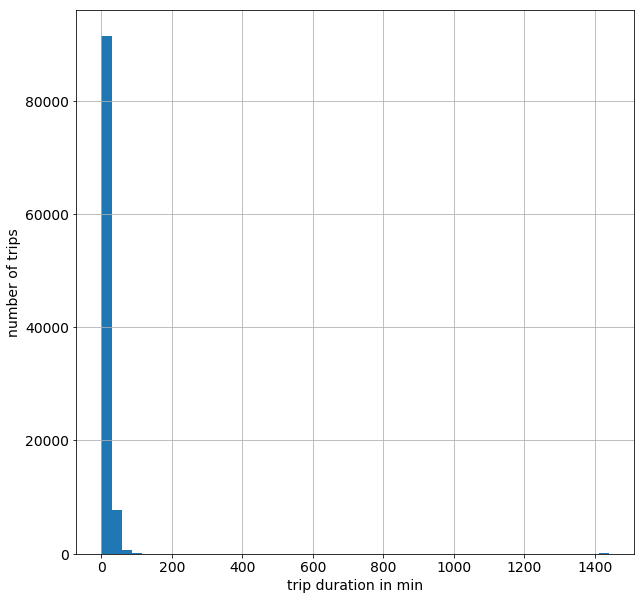

In [7]:
fig = plt.figure()
ax = fig.gca()
ax.hist(df['trip_duration_minutes'], bins=50)
ax.set_xlabel('trip duration in min')
ax.set_ylabel('number of trips')
ax.grid()

Vast majority in the first bin. This means there are few tours with a very high trip duration. What now?

**Log transform on y-axis.**

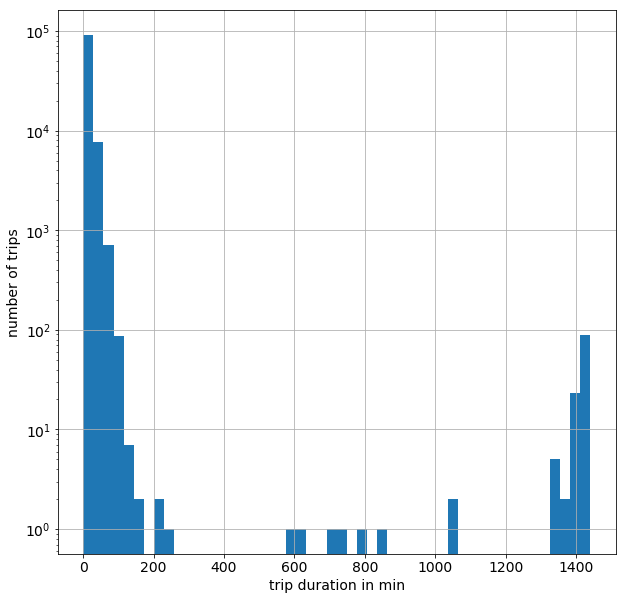

In [8]:
fig = plt.figure()
ax = fig.gca()
ax.hist(df['trip_duration_minutes'], bins=50)
ax.set_xlabel('trip duration in min')
ax.set_ylabel('number of trips')
ax.set_yscale('log')
ax.grid()

In [9]:
df = df[df['trip_duration_minutes'] < 200]

Continue exploring the distribution of `trip_duration` further and keep filtering out values until you are happy with the result.

- Which values did you filter out and why?
  - Don't forget to look not only at big values but also very small values.
- Show the distribution after filtering outliers.

## TASK 3 - Outliers (part 2)
Filter out outliers in location columns 
- `pickup_longitude`
- `pickup_latitude`
- `dropoff_longitude`
- `dropoff_latitude`

Visualize the pickup and dropoff locations in a scatter plot.

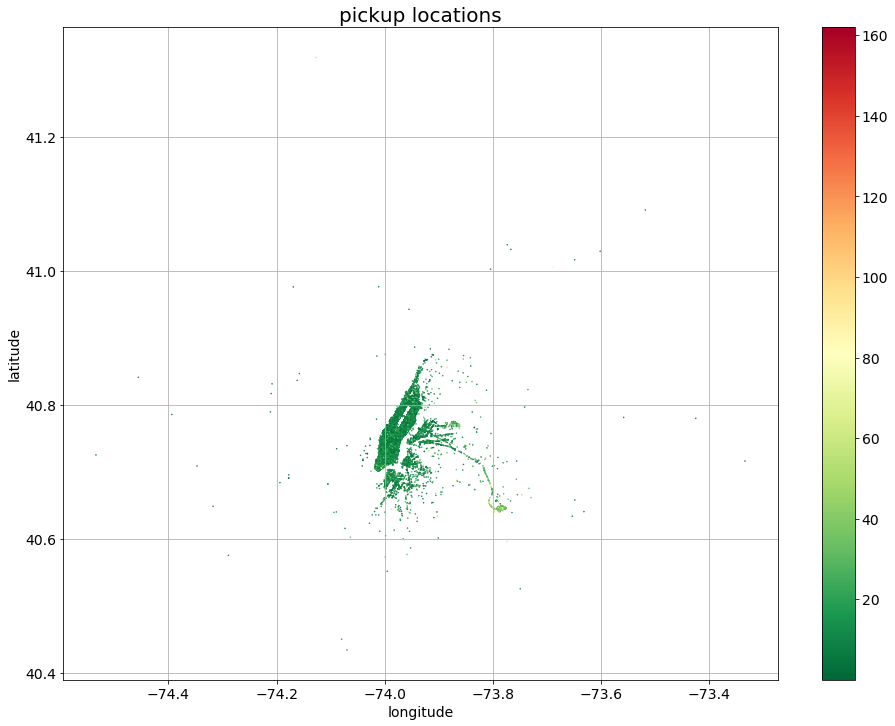

In [10]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca()
s = ax.scatter(df['pickup_longitude'], df['pickup_latitude'], marker='.', s=1, 
               c=df['trip_duration_minutes'], cmap='RdYlGn_r')
ax.set_title('pickup locations', fontsize=20)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.grid()
fig.colorbar(s);

In [11]:
df = df[df['pickup_latitude'].between(40.55, 40.95) & \
        df['pickup_longitude'].between(-74.1, -73.7)]

Is filtering on these values sufficient? 

Once you cleaned the dataset based on pickup location, do the same for dropoff location.

## TASK 4 - locations with long trips
At which pickup / dropoff locations can we find the longest trips? Does it make sense?

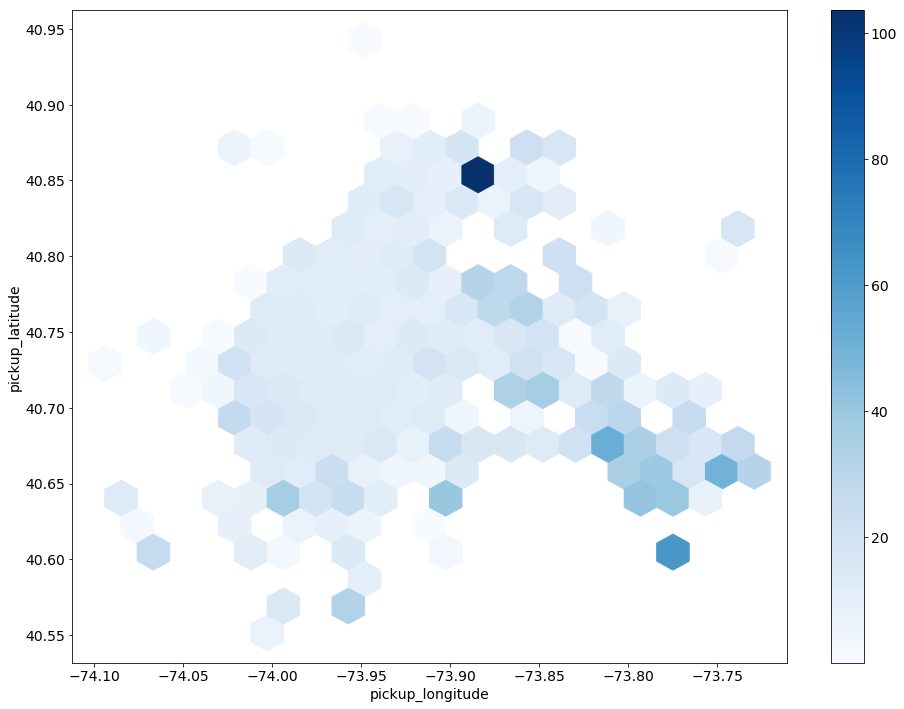

In [12]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca()
df.plot.hexbin(x='pickup_longitude', y='pickup_latitude', 
               C='trip_duration_minutes', gridsize=20, cmap='Blues', ax=ax);

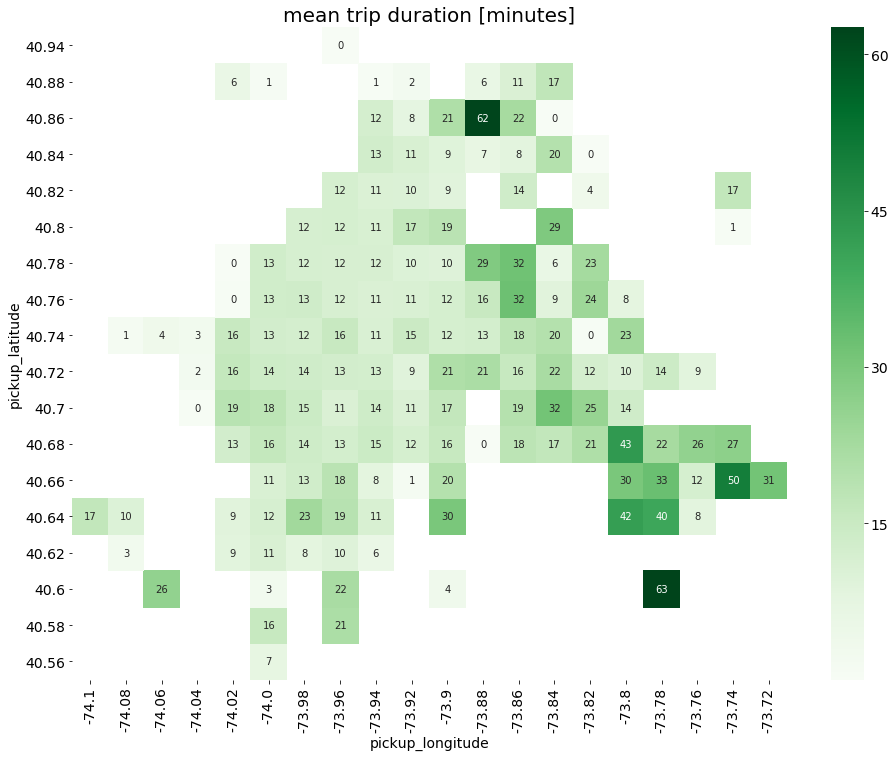

In [13]:
pickup = df.groupby([precision(df['pickup_longitude'], 0.02), 
                     precision(df['pickup_latitude'], 0.02)]
                   )['trip_duration_minutes'].mean().reset_index().round(2)
pick = pickup.pivot('pickup_latitude','pickup_longitude','trip_duration_minutes')
fig = plt.figure(figsize=(16, 12))
ax = fig.gca()
sns.heatmap(pick, cmap='Greens', ax=ax, annot=True, fmt=".0f")
ax.set_title('mean trip duration [minutes]', fontsize=20)
ax.invert_yaxis()

Analyse mean trip duration based on dropoff location.

You can also visualize other variables, such as `vendor_id` or `passenger_count` in relation with locations if you have time.

## TASK 5 - Trip length vs time
- When during the week do the customers make the shortest trips?
- When do they make the longest trips?

In [14]:
df['weekday'] = df['pickup_datetime'].dt.weekday # 0 is Monday
df['hour'] = df['pickup_datetime'].dt.hour

Convert each week and hour into a number 0-167 representing number of hours since Monday midnight.

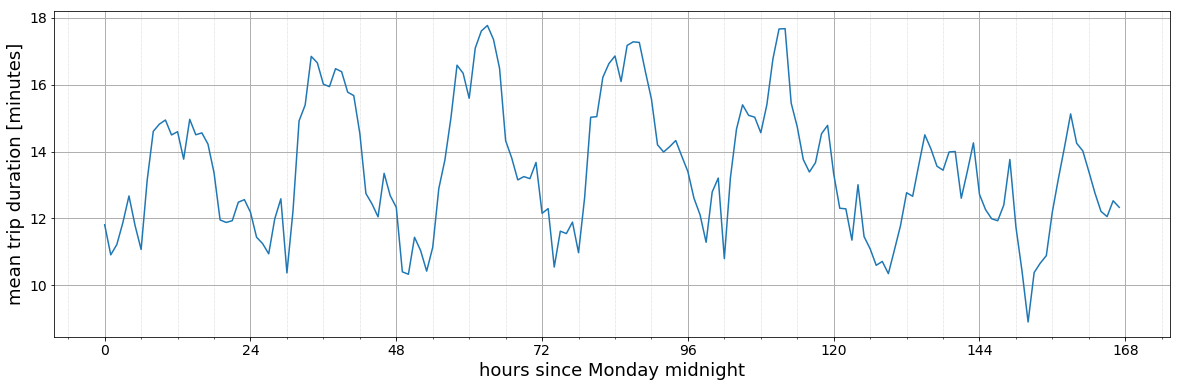

In [15]:
df['week_hours'] = df['weekday'] * 24 + df['hour']
week_hours = df.groupby('week_hours')['trip_duration_minutes'].mean()
fig = plt.figure(figsize=(20,6))
ax = fig.gca()
ax.plot(week_hours)
ax.set_xlabel('hours since Monday midnight', fontsize=18)
ax.set_ylabel('mean trip duration [minutes]', fontsize=18)
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(6))
ax.grid(which='minor', linestyle=':', linewidth=0.5)
ax.grid(which='major', linestyle='-', linewidth=1)

We can visualize the same thing as a table with `weekdays` \* `hours` and the value (color) in the cell represents the measure - in our case the *mean trip duration*.

Use `sns.heatmap()` from the previous task to show this visualization.

## TASK 6
### Passenger count per vendor
How does the distribution of `passenger_count` per vendor look like? Are they similar?

Draw a barchart to explore that.